In [ ]:
# Listas
a = [1,24,'giclas', [3,5,1,5,2,3], True,'ciglas',3.0]
a[0] = True

In [ ]:
print(a)

[True, 24, 'giclas', [3, 5, 1, 5, 2, 3], True, 'ciglas', 3.0]


In [ ]:
# Tuplas
b = (1,24,'giclas',True,'ciglas',3.0)

In [ ]:
# Numérico
int 1 2 3 4 5 
float 1.0 2.0 4.5

In [ ]:
# cadena de texto
'a'

In [ ]:
# Booleanos
bool True False

# <font color = 'tomato'> DESCRIPCIÓN DE DATOS HIDROMETEOROLÓGICOS

## Selección de carpeta de trabajo


In [1]:
import os
os.chdir("/content/") # Establecemos la carpeta de trabajo por defecto
os.getcwd()           # Consultamos en qué dirección estamos

'/content'

## Carga de datos

In [23]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
# Pandas: manipular Dataframes
# Numpy: manipulación de matrices
# matplotlib: Visualización
# Seaborn: Visualización preestablecidas. Basado en Matplotlib

### Formato .xlsx (Excel)

In [21]:
!pip install openpyxl==3.0.9

In [24]:
df_excel = pd.read_excel('/content/ho00000503.xlsx', sheet_name='Hoja2')
df_excel

ImportError: ignored

### Formato .csv


In [15]:
df_csv = pd.read_csv('/content/ho00000503.csv', sep = ';')
df_csv.tail(3)

,Column1,Column2,Column3,Column4,Column5,Column6
20085,2019,12,29,7.6,22.0,7.4
20086,2019,12,30,0.2,22.2,8.6
20087,2019,12,31,10.1,22.4,7.0


### Formato .txt

In [25]:
len(df)-1

NameError: ignored

In [26]:
a = len(df)-1
print(f'{a}-01-01')

NameError: ignored

In [27]:
df = pd.read_csv('/content/ho00000503.txt', sep = '\t', header=None).replace(-99.9, np.NaN)
date_o = f'{df[0][0]}-{df[1][0]}-{df[2][0]}'      # Fecha inicial
date_f = f'{df[0][len(df)-1]}-{df[1][len(df)-1]}-{df[2][len(df)-1]}'  # Fecha final
df.index = pd.date_range(start = date_o, end = date_f, freq = 'd')

df.drop(labels = [0,1,2], axis = 1, inplace=True)
df.columns = ['pp', 'tx', 'tn']
df.head(3)  # \ = AltGr + '

,pp,tx,tn
1965-01-01,11.0,18.7,6.1
1965-01-02,0.0,17.2,4.0
1965-01-03,1.0,14.4,6.9


### ¿Cómo describimos el dataset?
Según Wackerly et al. (2010), existen dos medidas para describir un conjunto de datos.
* Medidas descriptivas numéricas
* Medidas descriptivas gráficas

## <font color = '#96E985'> **ESCALA DIARIA**

### <font color = 'lightblue'> Medidas descriptivas numéricas


In [ ]:
### Cantidad de datos ###
# Numéro total de datos = número de filas
# Número de datos faltantes (NaN); NaN = Not a Number, NA = No Available

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20088 entries, 1965-01-01 to 2019-12-31
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pp      17677 non-null  float64
 1   tx      17693 non-null  float64
 2   tn      17111 non-null  float64
dtypes: float64(3)
memory usage: 627.8 KB


In [ ]:
### Resumen estadístico ###
# Promedio (mean)
# Desviación estándar (std)
# Mínimo y máximo => posibles outliers
# Percentiles: 0.25, 0.5 y 0.75 

df.describe()

,pp,tx,tn
count,17677.000000,17693.000000,17111.000000
mean,1.962578,19.533137,4.806160
std,4.169537,2.176615,3.233265
min,0.000000,7.500000,-8.300000
25%,0.000000,18.200000,2.600000
50%,0.000000,19.700000,5.400000
75%,2.000000,21.000000,7.400000
max,48.800000,27.800000,11.700000


Nos sirve, pero es muy soso...

En estadística no solo importa lo que obtienes, también la forma en la que lo presentas.

In [ ]:
sm1 = df.describe().transpose()
nan = pd.DataFrame(df.isna().sum(), columns=['Missing values'])

pd.merge(sm1, nan, on = sm1.index, right_index=True).drop('key_0', axis=1)

,count,mean,std,min,25%,50%,75%,max,Missing values
pp,17677.0,1.962578,4.169537,0.0,0.0,0.0,2.0,48.8,2411
tx,17693.0,19.533137,2.176615,7.5,18.2,19.7,21.0,27.8,2395
tn,17111.0,4.806160,3.233265,-8.3,2.6,5.4,7.4,11.7,2977


### <font color = 'yellow'> Medidas descriptivas gráficas

#### Serie de tiempo


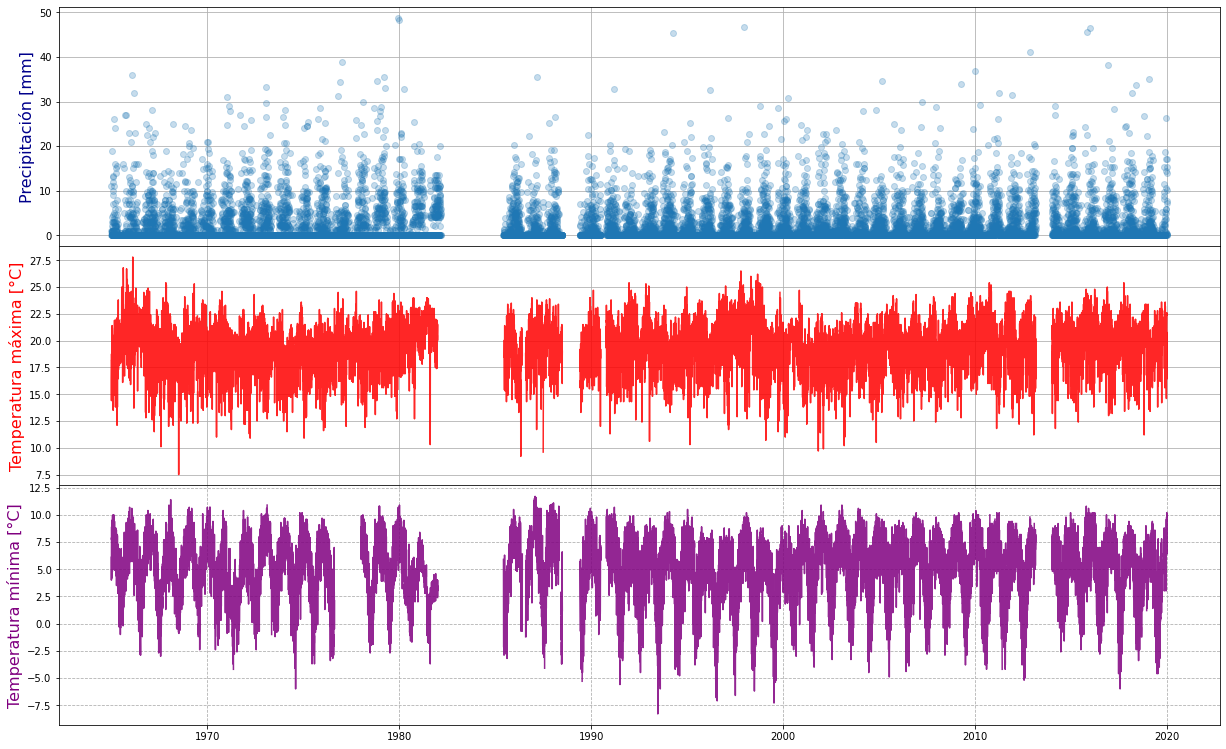

In [ ]:
### Series de tiempo ###
fig, axes = plt.subplots(nrows = 3, ncols= 1, figsize = (18,12), sharex=True)

axes[0].plot(df.index, df['pp'], 'o', alpha = 0.25)
axes[0].set_ylabel('Precipitación [mm]', color = 'darkblue', fontsize = 16)
axes[0].grid()

axes[1].plot(df.index, df['tx'], '-', alpha = 0.85, color = 'red')
axes[1].set_ylabel('Temperatura máxima [°C]', color = 'red', fontsize = 16)
axes[1].grid()

axes[2].plot(df.index, df['tn'], '-', alpha = 0.85, color = 'purple')
axes[2].set_ylabel('Temperatura mínima [°C]', color = 'purple', fontsize = 16)
axes[2].grid(True, linestyle = '--')

plt.subplots_adjust(top=0.912, bottom=0.081, left=0.081,right=0.977,hspace=0,wspace=0)

#### Histogramas

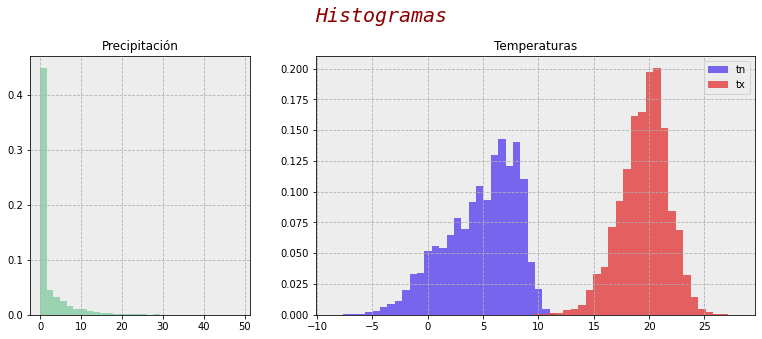

In [ ]:
### Histogramas ###
# Distribución de datos
rc = {'figure.dpi': 500,
      'axes.facecolor': '#EDEDED',
      'axes.grid': True, 'grid.linestyle': '--'}
sns.set_style(rc = rc)

fig, axes = plt.subplots(1,2, figsize = (13,5), 
                         gridspec_kw={'width_ratios':[1,2], 'height_ratios':[1]})

main_dict = {'family': 'monospace', 
             'weight': 'normal',
             'color': 'darkred',
             'style': 'italic'}

fig.suptitle('Histogramas', fontsize = 20, fontdict = main_dict)

axes[0].hist(df['pp'], bins = 30, density = True, alpha = 0.85, color = '#8ACFA7'); axes[0].set_title('Precipitación')
axes[1].hist(df['tn'], bins = 30, density = True, alpha = 0.85, color = '#624FEE')
axes[1].hist(df['tx'], bins = 30, density = True, alpha = 0.85, color = '#E34747'); axes[1].set_title('Temperaturas')
axes[1].legend(['tn', 'tx'], loc=0)

plt.subplots_adjust(top=0.845)

#### Valores perdidos

In [ ]:
!pip install missingno

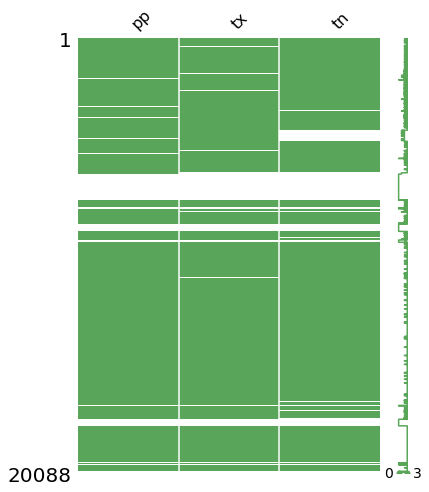

In [ ]:
import missingno as msno

msno.matrix(df, color=(0.35, 0.65, 0.35), figsize = (6,8))  # RGB

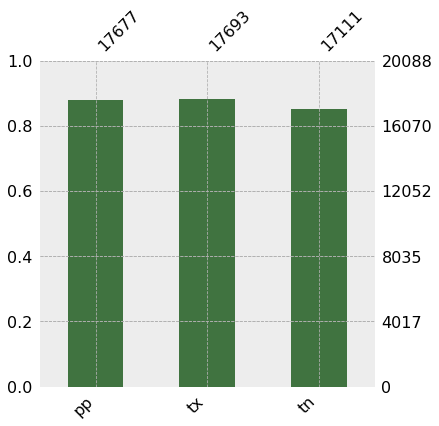

In [ ]:
msno.bar(df, figsize = (6,6), color = (0.25, 0.45, 0.25)) # color = RGB 

## <font color = '#96E985'> **ESCALA MENSUAL**

### Revisar el año 1982...

Text(0.5, 1.0, '1979 - 1981')

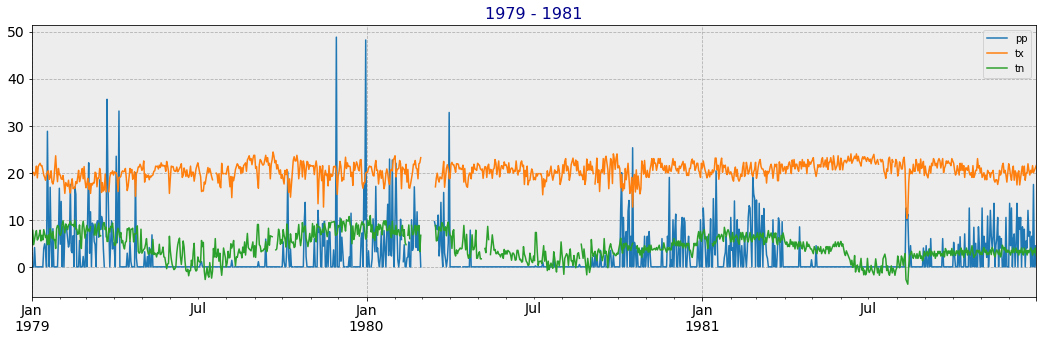

In [ ]:
df['1979':'1981'].plot(fontsize = 14, figsize=(18,5))
plt.title('1979 - 1981', fontsize = 16, color = 'darkblue')

Text(0.5, 1.0, '1979 - 1982')

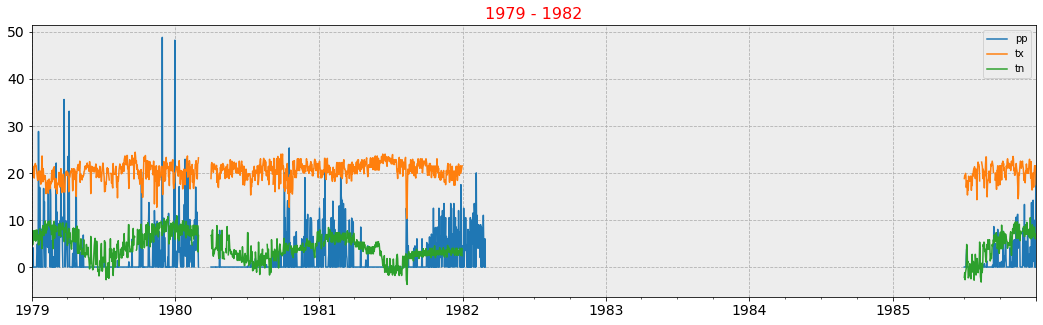

In [ ]:
df['1979':'1985'].plot(fontsize = 14, figsize=(18,5))
plt.title('1979 - 1982', fontsize = 16, color = 'red')

### Regla de 3/5

In [ ]:
years = df.index.year.unique().to_list()
month = df.index.month.unique().to_list()

for k in df.columns.to_list():
  for i in years:
    for j in month:
      # if np.isnan([x for x in df[f'{i}-{j}'][k]]).sum() == len(df[f'{i}-{j}'][k]):
      if np.isnan(df[f'{i}-{j}'][k]).sum() == len(df[f'{i}-{j}'][k]):
        continue
      else:
        ## Regla 2: más de 5 valores perdidos
        nan_days = df[f'{i}-{j}'][k].isna().sum()
        if nan_days > 5:
          df[f'{i}-{j}'][k] = np.NaN
          print(f'Eliminado {i}-{j} en {k}')

        ## Regla 1: 3 días consecutivos de valores perdidos
        nan_days_ac = 0
        for l in df[f'{i}-{j}'][k]:
          if l == np.NaN: nan_days_ac+=1
          if nan_days_ac == 3:
            df[f'{i}-{j}'][k] = np.NaN
            print(f'Eliminado {i}-{j} en {k}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Eliminado 1969-10 en pp
Eliminado 1970-4 en pp
Eliminado 1973-9 en pp
Eliminado 1974-11 en pp
Eliminado 1980-3 en pp
Eliminado 1985-6 en pp
Eliminado 1990-10 en pp
Eliminado 1990-11 en pp
Eliminado 2018-9 en pp
Eliminado 2018-10 en pp
Eliminado 2018-11 en pp
Eliminado 2018-12 en pp
Eliminado 2019-12 en pp
Eliminado 1970-3 en tx
Eliminado 1980-3 en tx
Eliminado 1985-6 en tx
Eliminado 1986-12 en tx
Eliminado 1990-10 en tx
Eliminado 2018-9 en tx
Eliminado 2018-10 en tx
Eliminado 2018-11 en tx
Eliminado 2018-12 en tx
Eliminado 2019-12 en tx
Eliminado 1970-3 en tn
Eliminado 1976-8 en tn
Eliminado 1978-1 en tn
Eliminado 1980-3 en tn
Eliminado 1985-6 en tn
Eliminado 1986-12 en tn
Eliminado 1990-10 en tn
Eliminado 2012-2 en tn
Eliminado 2012-12 en tn
Eliminado 2013-2 en tn
Eliminado 2018-9 en tn
Eliminado 2018-10 en tn
Eliminado 2018-11 en tn
Eliminado 2018-12 en tn
Eliminado 2019-12 en tn


### Cálculo




In [ ]:
# Temperatura promedio
df_monthly=df[['tx', 'tn']].resample('M').mean()
df_monthly.head(3)

,tx,tn
1965-01-31,18.319355,6.937037
1965-02-28,17.278571,7.878571
1965-03-31,18.319355,7.248387


,tx,tn,pp
1965-01-31,18.319355,6.937037,88
1965-02-28,17.278571,7.878571,90.4
1965-03-31,18.319355,7.248387,90.7
1965-04-30,19.462069,6.277778,64.5
1965-05-31,20.512903,3.309677,0
...,...,...,...
2019-08-31,20.135484,0.419355,0.3
2019-09-30,20.013333,4.446667,14.3
2019-10-31,NaN,NaN,NaN
2019-11-30,20.513333,5.860000,99.8


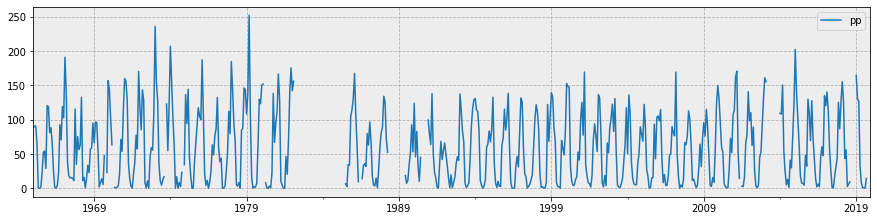

In [ ]:
# Precipitación acumulada
years = df.index.year.unique().to_list()
month = df.index.month.unique().to_list()
pp_monthly = pd.DataFrame(columns=['pp'], index=df_monthly.index)
pp_monthly.head(3)

for i in years:
  for j in month:
    if np.isnan(df[f'{i}-{j}']['pp']).sum()==len(df[f'{i}-{j}']['pp']):
      pp_monthly.loc[f'{i}-{j}'] = np.NaN
    else:
      pp_monthly.loc[f'{i}-{j}'] = df[f'{i}-{j}']['pp'].sum()
pp_monthly.plot(figsize = (15,3.5))

df_monthly['pp'] = pp_monthly
df_monthly

### Boxplot

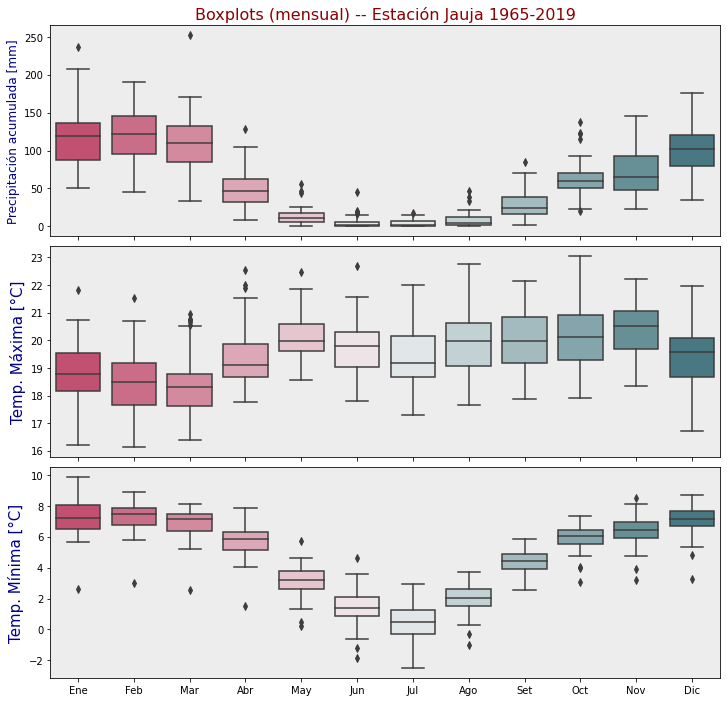

In [ ]:
### Boxplot ###
# Distribución de datos
sns.set_style(rc = {'axes.grid' : False})
pl = sns.diverging_palette(0, -150, s=75,n = 12)
fig, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize = (12,12), sharex=True)
ax1.set_title('Boxplots (mensual) -- Estación Jauja 1965-2019', color= 'darkred', fontsize = 16)

ylab_dict = {'size': 15, 'color': 'darkblue'}

sns.boxplot(x = df_monthly.index.month, y = 'pp', data = df_monthly, ax = ax1, palette=pl); ax1.set_ylabel('Precipitación acumulada [mm]', fontdict = ylab_dict, fontsize = 12)
sns.boxplot(x = df_monthly.index.month, y = 'tx', data = df_monthly, ax = ax2, palette=pl); ax2.set_ylabel('Temp. Máxima [°C]', fontdict = ylab_dict)
sns.boxplot(x = df_monthly.index.month, y = 'tn', data = df_monthly, ax = ax3, palette=pl); ax3.set_ylabel('Temp. Mínima [°C]', fontdict = ylab_dict)

plt.xticks(ticks=range(0,12), labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Dic'])
plt.subplots_adjust(hspace=0.05)